In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

### Load dataset

In [13]:
df = pd.read_csv('song_data.csv')

### Define features and target

In [14]:
X = df.drop(['song_name', 'song_popularity'], axis=1)
y = df['song_popularity']

### Split dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize features

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Define the neural network model

In [17]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer for regression

c:\Users\mmarijanovic\OneDrive - Deloitte (O365D)\Desktop\Data Exploration\Data_Exploration\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


### Train the model

In [19]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2087.5571 - mean_squared_error: 2087.5571 - val_loss: 501.3521 - val_mean_squared_error: 501.3521
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 495.1382 - mean_squared_error: 495.1382 - val_loss: 476.6451 - val_mean_squared_error: 476.6451
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 465.0543 - mean_squared_error: 465.0543 - val_loss: 465.1769 - val_mean_squared_error: 465.1769
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 450.4184 - mean_squared_error: 450.4184 - val_loss: 457.9750 - val_mean_squared_error: 457.9750
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 443.6682 - mean_squared_error: 443.6682 - val_loss: 454.9088 - val_mean_squared_error: 454.9088
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 453.0854 - mean_squared_error: 453.0854 - val_loss: 449.3897 - val_mean_squared_error: 449.3897
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - l

### Make predictions

In [20]:
y_pred_nn = model.predict(X_test_scaled)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Evaluate the model

In [21]:
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network R^2 Score: {r2_nn}')

Neural Network Mean Squared Error: 440.38217318355254
Neural Network R^2 Score: 0.08648943901062012


### Plot training & validation loss values

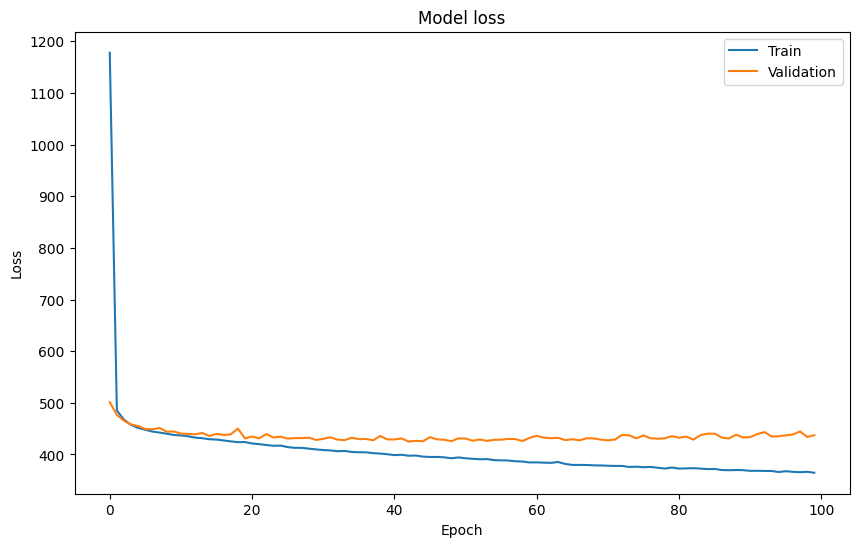

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()